In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('dataws_10 (1).csv')

In [3]:
# Memisahkan fitur (X) dan target (y)
X = df[['RPM_Feeder', 'Amp_Press', 'Temp_Cond_1', 'Temp_Cond_2', 'Temp_Cond_3', 'Temp_Post_Pellet']]  # Fitur
y = df['WS_Dryer']  # Target

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Membuat dan melatih model regresi linier
from sklearn.linear_model import Lasso


In [5]:
# Instead of LinearRegression, use Lasso or Ridge for regularization.
# Lasso uses L1 regularization, while Ridge uses L2 regularization.
from sklearn.linear_model import Lasso  # or from sklearn.linear_model import Ridge

# Create and train the Lasso model
model = Lasso(alpha=0.1)  # alpha is the regularization strength, equivalent to C in other models
# If using Ridge, it would be: model = Ridge(alpha=1.0)

model.fit(X_train, y_train) # Changed lasso_model to model

Lasso(alpha=0.1)

In [6]:
# Prediksi harga rumah berdasarkan data uji
y_pred = model.predict(X_test)

In [9]:
# Menampilkan hasil prediksi dan nilai asli
print("\nPrediksi WS:")
print(y_pred)

# Menampilkan nilai R^2 (koefisien determinasi)
import statsmodels.api as sm

print(f"\nNilai R^2: {model.score(X_test, y_test):.4f}")


Prediksi WS:
[0.64057034 0.58174905 0.5886692  0.64403042 0.5886692  0.64057034]

Nilai R^2: -1.2713


In [10]:
# Evaluasi model: MSE, RMSE, dan MAE
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.07
Mean Absolute Error (MAE): 0.05


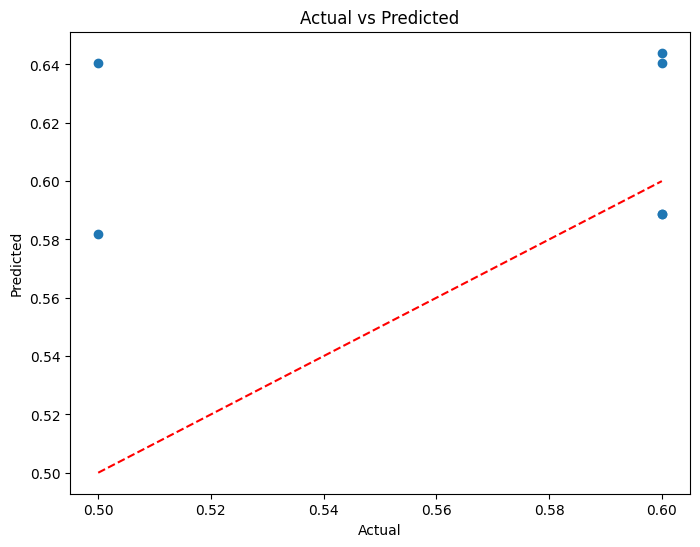

In [11]:
# Plotting hasil prediksi vs nilai asli
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


In [12]:
# Hitung Mean Squared Error
from sklearn.metrics import mean_squared_error
mse_lasso = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Lasso Regression):", mse_lasso)

# Koefisien yang dihasilkan oleh model
print("Koefisien Lasso Regression:", model.coef_)

Mean Squared Error (Lasso Regression): 0.005047388762788711
Koefisien Lasso Regression: [ 0.00346008 -0.         -0.         -0.         -0.          0.        ]


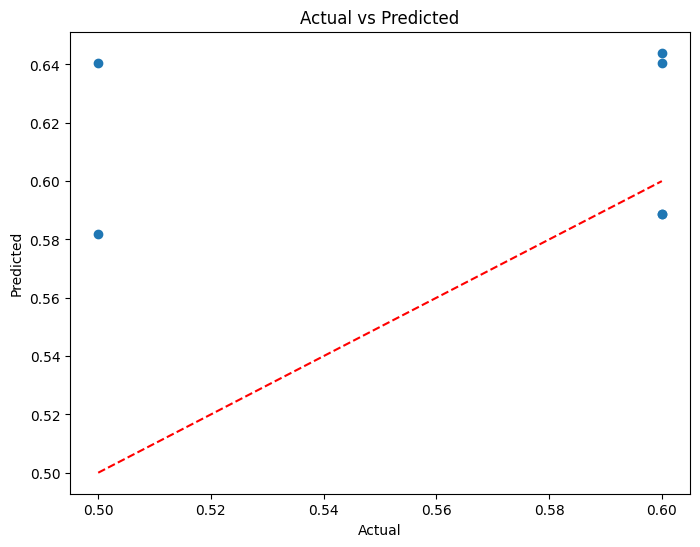

In [13]:
# Plotting hasil prediksi vs nilai asli
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


In [14]:
def prediksi_harga():
    # Input data dari pengguna
    print("Masukkan Data:")

    RPM_Feeder = float(input("Masukkan data RPM Feeder: "))
    Amp_Press = float(input("Masukkan data Amp Press: "))
    Temp_Cond_1 = float(input("Masukkan data Temp Cond 1: "))
    Temp_Cond_2 = float(input("Masukkan data Temp Cond 2: "))
    Temp_Cond_3 = float(input("Masukkan data Temp Cond 3: "))
    Temp_Post_Pellet = float(input("Masukkan data Temp Post Pellet: "))

    # Membuat array fitur dari input pengguna
    input_data = np.array([[RPM_Feeder, Amp_Press, Temp_Cond_1, Temp_Cond_2, Temp_Cond_3, Temp_Post_Pellet]])

    # Memuat model yang sudah dilatih (misalnya menggunakan pickle)
    # Inisialisasi model untuk contoh ini (gunakan model yang telah disimpan dengan pickle)
    # with open(model_filename, 'rb') as f:
    #     model = pickle.load(f)

    # Prediksi harga menggunakan model
    prediksi = model.predict(input_data)

    # Menampilkan hasil prediksi
    # Extract the predicted value as a float before formatting
    predicted_value = prediksi[0].item()  # Convert to native Python float
    # Added precision to the format specifier (e.g., .0f for 0 decimal places)
    print(f"\nPrediksi WS adalah: {predicted_value:,.2f}") # Changed from {predicted_value:,.f} to {predicted_value:,.0f}


# Menjalankan fungsi prediksi
prediksi_harga()

Masukkan Data:
Masukkan data RPM Feeder: 200
Masukkan data Amp Press: 98
Masukkan data Temp Cond 1: 70
Masukkan data Temp Cond 2: 75
Masukkan data Temp Cond 3: 80
Masukkan data Temp Post Pellet: 117

Prediksi WS adalah: 0.64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [15]:
import pickle

In [17]:
filename = 'PrediksiWS.sav'
pickle.dump(model, open(filename, 'wb'))